In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [448]:
df = pd.read_csv("train_indessa.csv")
df.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0


# Data Cleaning

In [449]:
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
df_null.sort_values("Percent", ascending=False)

,Count,Percent
verification_status_joint,532123,99.942715
desc,456829,85.801085
mths_since_last_record,450305,84.575755
mths_since_last_major_derog,399448,75.023853
mths_since_last_delinq,272554,51.190771
batch_enrolled,85149,15.992585
total_rev_hi_lim,42004,7.889142
tot_cur_bal,42004,7.889142
tot_coll_amt,42004,7.889142
emp_title,30833,5.791018


#### Drop the columns with 50% missing values

In [450]:
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
print(df.shape)
df.head(3)

(532428, 40)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0


keep only those columns need for analysis.
Columns like loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate provides more information than member_id, batch_enrolled

In [451]:
df = df[['member_id','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'grade', 'sub_grade', 
        'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose',
        'dti','delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal', 'initial_list_status',
        'total_rec_int', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
        'application_type', 'acc_now_delinq','loan_status']]
df.shape

(532428, 27)

In [452]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_rec_int,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,532412.000000,5.324280e+05,532428.000000,532428.000000,532428.000000,532333.000000,532412.000000,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,11.545594,0.194858,1.692128e+04,1753.428788,45.717832,4.859221,0.014299,0.005015,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,5.311442,0.583822,2.242322e+04,2093.199837,409.647467,63.123361,0.133005,0.079117,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,8.000000,0.000000,6.444000e+03,441.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,11.000000,0.000000,1.187600e+04,1072.690000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,14.000000,0.000000,2.084300e+04,2234.735000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,90.000000,86.000000,2.568995e+06,24205.620000,33520.270000,7002.190000,16.000000,14.000000,1.000000


In [453]:
df.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_rec_int,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,loan_status
member_id,1.000000,0.065607,0.067888,0.073426,-0.141030,0.034649,0.134179,0.049956,0.087966,0.080268,0.035607,-0.461192,-0.113868,-0.072498,0.051447,0.017607,-0.489753
loan_amnt,0.065607,1.000000,0.999276,0.997124,0.145037,0.330655,0.041866,-0.000454,0.197630,-0.080952,0.333944,0.532580,0.073326,0.052995,-0.014822,0.003196,-0.095713
funded_amnt,0.067888,0.999276,1.000000,0.998041,0.145222,0.330493,0.042699,-0.000171,0.198078,-0.080613,0.333785,0.531616,0.072895,0.052797,-0.014663,0.003298,-0.097563
funded_amnt_inv,0.073426,0.997124,0.998041,1.000000,0.145251,0.329495,0.044952,0.000280,0.198672,-0.079552,0.331935,0.529116,0.071242,0.050261,-0.014240,0.003473,-0.101877
int_rate,-0.141030,0.145037,0.145222,0.145251,1.000000,-0.072061,0.163206,0.056767,-0.009115,0.052291,-0.035814,0.445634,0.107292,0.071187,0.013924,0.026984,0.002590
annual_inc,0.034649,0.330655,0.330493,0.329495,-0.072061,1.000000,-0.175867,0.047873,0.134948,-0.007829,0.297585,0.127483,0.007190,0.006332,-0.003960,0.014906,-0.008596
dti,0.134179,0.041866,0.042699,0.044952,0.163206,-0.175867,1.000000,-0.007164,0.297186,-0.045428,0.136762,0.018475,0.002544,0.003708,0.001032,0.007267,-0.134020
delinq_2yrs,0.049956,-0.000454,-0.000171,0.000280,0.056767,0.047873,-0.007164,1.000000,0.052561,-0.010797,-0.031761,0.002810,-0.000473,0.000011,0.063426,0.133391,-0.045717
open_acc,0.087966,0.197630,0.198078,0.198672,-0.009115,0.134948,0.297186,0.052561,1.000000,-0.024764,0.222968,0.062011,0.000874,0.002537,0.010917,0.017665,-0.065048
pub_rec,0.080268,-0.080952,-0.080613,-0.079552,0.052291,-0.007829,-0.045428,-0.010797,-0.024764,1.000000,-0.101027,-0.060336,-0.013688,-0.007849,0.021157,0.001331,-0.048884


In [454]:
corr = df.corr()

<AxesSubplot:>

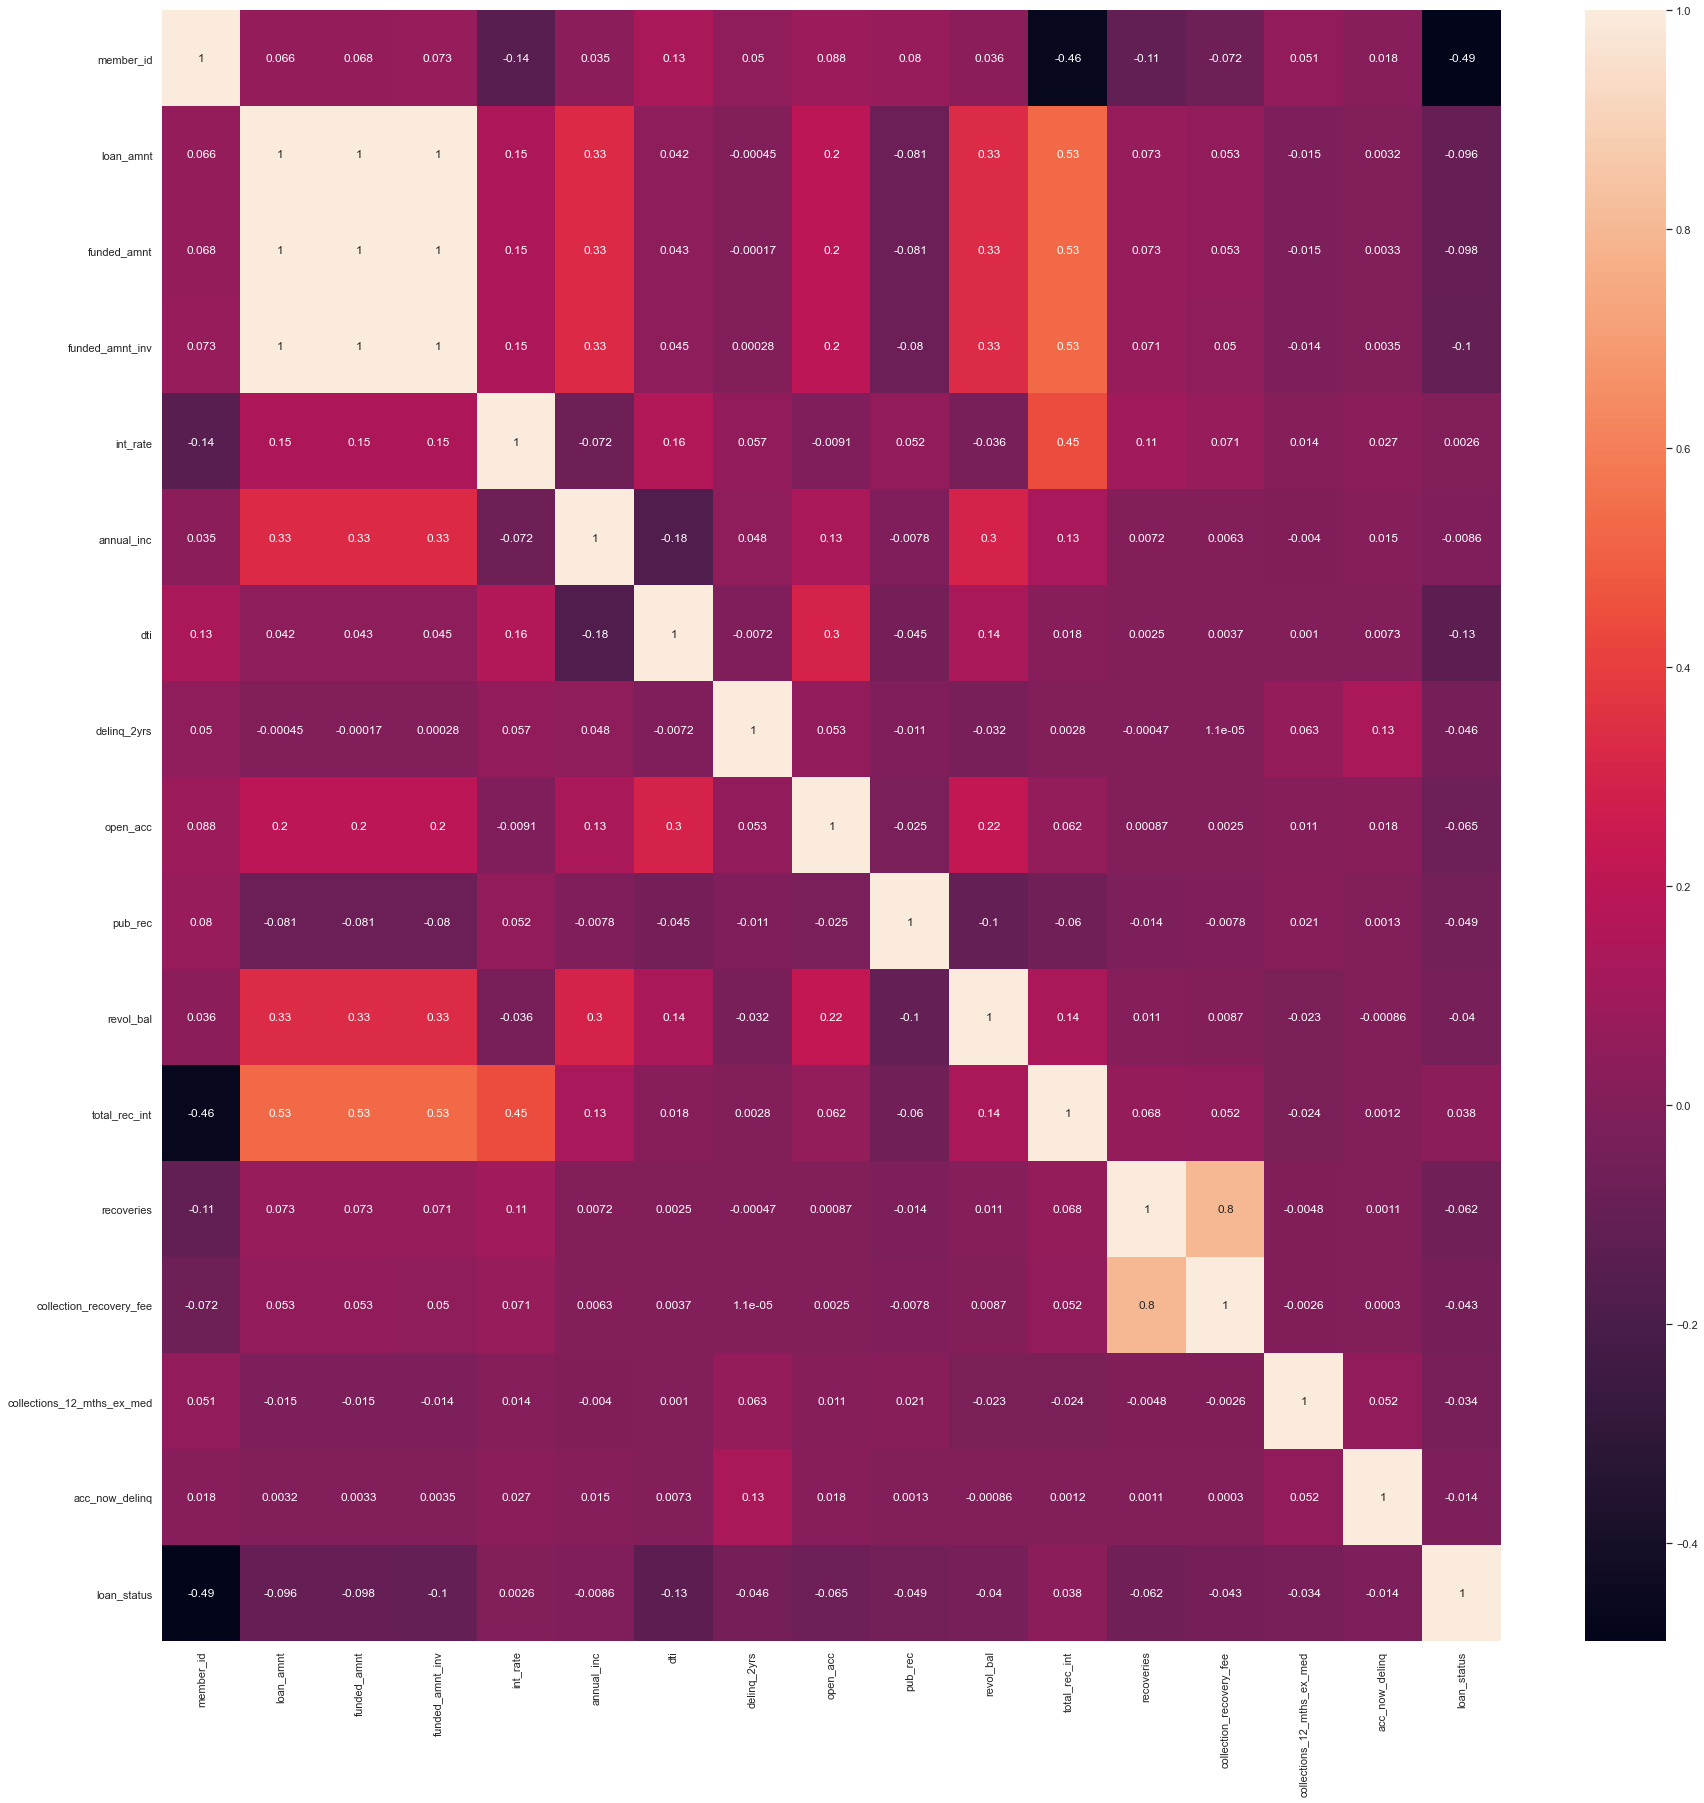

In [455]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(corr, annot = True)

In [456]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal',
       'initial_list_status', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'loan_status'],
      dtype='object')

Lets try to reduce number of columns by checking its correlation with othe columns

In [457]:
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()
# 'loan_amnt', 'funded_amnt', 'funded_amnt_inv' are highly correlated let take one column and drop other

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999276,0.997124
funded_amnt,0.999276,1.000000,0.998041
funded_amnt_inv,0.997124,0.998041,1.000000


In [458]:
df = df.drop(columns = ["loan_amnt","funded_amnt"])
df.shape

(532428, 25)

In [459]:
df.dtypes

member_id                       int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
pymnt_plan                     object
purpose                        object
dti                           float64
delinq_2yrs                   float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
initial_list_status            object
total_rec_int                 float64
recoveries                    float64
collection_recovery_fee       float64
collections_12_mths_ex_med    float64
application_type               object
acc_now_delinq                float64
loan_status                     int64
dtype: object

In [460]:
df.columns

Index(['member_id', 'funded_amnt_inv', 'term', 'int_rate', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'initial_list_status',
       'total_rec_int', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'loan_status'],
      dtype='object')

In [461]:
df["term"] = df["term"].apply(lambda x : int(x[:2]))

In [462]:
df["grade"].unique()

array(['E', 'B', 'A', 'D', 'C', 'F', 'G'], dtype=object)

In [463]:
# One hot encoding
dummy = pd.get_dummies(df["grade"])
df = pd.concat([df,dummy],axis=1)
df = df.drop(columns = ["grade","G"])
df.head(3)

,member_id,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,...,collections_12_mths_ex_med,application_type,acc_now_delinq,loan_status,A,B,C,D,E,F
0,58189336,14350.0,36,19.19,E3,9 years,OWN,28700.0,Source Verified,n,...,0.0,INDIVIDUAL,0.0,0,0,0,0,0,1,0
1,70011223,4800.0,36,10.99,B4,< 1 year,MORTGAGE,65000.0,Source Verified,n,...,0.0,INDIVIDUAL,0.0,0,0,1,0,0,0,0
2,70255675,10000.0,36,7.26,A4,2 years,OWN,45000.0,Not Verified,n,...,0.0,INDIVIDUAL,0.0,0,1,0,0,0,0,0


In [464]:
dummy = pd.get_dummies(df["sub_grade"])
df = pd.concat([df,dummy],axis=1)
df = df.drop(columns = ["sub_grade", "G5"])
df.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4
0,58189336,14350.0,36,19.19,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
1,70011223,4800.0,36,10.99,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,...,0,0,0,0,0,0,0,0,0,0
2,70255675,10000.0,36,7.26,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [465]:
df["emp_length"] = df["emp_length"].map({"1 year" : 1,"2 years" : 2,"3 years" : 3,"4 years" : 4,
                                         "5 years" : 5,"6 years" : 6,"1 years" : 7,"8 years" : 8,
                                         "9 years" : 9,"10 years" : 10,"10+ years" : 11, "< 1 year" : 0})

In [466]:
df["home_ownership"].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [467]:
dummy = pd.get_dummies(df["home_ownership"])
df = pd.concat([df,dummy],axis=1)
df = df.drop(columns = ["home_ownership", "NONE"])
df.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,pymnt_plan,purpose,dti,...,F5,G1,G2,G3,G4,ANY,MORTGAGE,OTHER,OWN,RENT
0,58189336,14350.0,36,19.19,9.0,28700.0,Source Verified,n,debt_consolidation,33.88,...,0,0,0,0,0,0,0,0,1,0
1,70011223,4800.0,36,10.99,0.0,65000.0,Source Verified,n,home_improvement,3.64,...,0,0,0,0,0,0,1,0,0,0
2,70255675,10000.0,36,7.26,2.0,45000.0,Not Verified,n,debt_consolidation,18.42,...,0,0,0,0,0,0,0,0,1,0


In [468]:
df["verification_status"].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [469]:
dummy = pd.get_dummies(df["verification_status"])
df = pd.concat([df,dummy],axis=1)
df = df.drop(columns = ["verification_status", "Not Verified"])
df.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,annual_inc,pymnt_plan,purpose,dti,delinq_2yrs,...,G2,G3,G4,ANY,MORTGAGE,OTHER,OWN,RENT,Source Verified,Verified
0,58189336,14350.0,36,19.19,9.0,28700.0,n,debt_consolidation,33.88,0.0,...,0,0,0,0,0,0,1,0,1,0
1,70011223,4800.0,36,10.99,0.0,65000.0,n,home_improvement,3.64,0.0,...,0,0,0,0,1,0,0,0,1,0
2,70255675,10000.0,36,7.26,2.0,45000.0,n,debt_consolidation,18.42,0.0,...,0,0,0,0,0,0,1,0,0,0


In [470]:
df["pymnt_plan"] = df["pymnt_plan"].map({"n":0,"y":1})

In [471]:
dummy = pd.get_dummies(df["purpose"])
df = pd.concat([df,dummy],axis=1)
df = df.drop(columns = ["purpose", "other"])
df.head(3)
#dummy.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,open_acc,...,educational,home_improvement,house,major_purchase,medical,moving,renewable_energy,small_business,vacation,wedding
0,58189336,14350.0,36,19.19,9.0,28700.0,0,33.88,0.0,14.0,...,0,0,0,0,0,0,0,0,0,0
1,70011223,4800.0,36,10.99,0.0,65000.0,0,3.64,0.0,6.0,...,0,1,0,0,0,0,0,0,0,0
2,70255675,10000.0,36,7.26,2.0,45000.0,0,18.42,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [472]:
df["initial_list_status"] = df["initial_list_status"].map({"w":0,"f":1})

In [473]:
df["application_type"] = df["application_type"].map({"INDIVIDUAL":0,"JOINT":1})

In [474]:
df["application_type"].unique()

array([0, 1], dtype=int64)

In [475]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [476]:
df.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,open_acc,...,educational,home_improvement,house,major_purchase,medical,moving,renewable_energy,small_business,vacation,wedding
0,58189336,14350.0,36,19.19,9.0,28700.0,0,33.88,0.0,14.0,...,0,0,0,0,0,0,0,0,0,0
1,70011223,4800.0,36,10.99,0.0,65000.0,0,3.64,0.0,6.0,...,0,1,0,0,0,0,0,0,0,0
2,70255675,10000.0,36,7.26,2.0,45000.0,0,18.42,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [477]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(532428, 80)
(478764, 80)


In [478]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [479]:
X = df.drop(columns = ["member_id", "loan_status"])
y = df["loan_status"]

# Model Selection 

In [480]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [481]:
models = {
          "logistic_regression" : {
                                   "model" : LogisticRegression(solver='liblinear',multi_class='auto'),
                                   "params" : {"logisticregression__C" : [1,5,10]}
                                  },
          
          "random_forest" : {
                             "model" : RandomForestClassifier(),
                             "params" :  {'randomforestclassifier__n_estimators': [1,25]}    
                            }, 
          "naive_bayes" : {
                           "model" : BernoulliNB(),
                           "params" : {"bernoullinb__alpha" : [1,5,10]}
                          },
         }

In [482]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in models.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, scoring = "roc_auc")
    clf.fit(X, y)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,logistic_regression,0.780310,{'logisticregression__C': 10}
1,random_forest,0.822808,{'randomforestclassifier__n_estimators': 25}
2,naive_bayes,0.712505,{'bernoullinb__alpha': 10}


# Test-Set Preprocessing

In [483]:
new_df = pd.read_csv("test_indessa.csv")
new_df = new_df[['member_id','funded_amnt_inv', 'term', 'int_rate', 'grade', 'sub_grade', 
                 'emp_length','home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'dti',
                 'delinq_2yrs','open_acc', 'pub_rec', 'revol_bal', 'initial_list_status', 'total_rec_int', 'recoveries', 
                 'collection_recovery_fee', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq']]
new_df.shape

(354951, 24)

In [484]:
new_df["term"] = new_df["term"].apply(lambda x : int(x[:2]))

In [485]:
# One hot encoding
dummy = pd.get_dummies(new_df["grade"])
new_df = pd.concat([new_df,dummy],axis=1)
new_df = new_df.drop(columns = ["grade","G"])
new_df.head(3)

,member_id,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,...,collection_recovery_fee,collections_12_mths_ex_med,application_type,acc_now_delinq,A,B,C,D,E,F
0,11937648,14000.0,60,16.24,C5,4 years,RENT,73500.0,Source Verified,n,...,0.0,0.0,INDIVIDUAL,0.0,0,0,1,0,0,0
1,38983318,16000.0,60,9.49,B2,5 years,MORTGAGE,105000.0,Source Verified,n,...,0.0,0.0,INDIVIDUAL,0.0,0,1,0,0,0,0
2,27999917,11050.0,60,15.61,D1,10+ years,RENT,62300.0,Not Verified,n,...,0.0,0.0,INDIVIDUAL,0.0,0,0,0,1,0,0


In [486]:
dummy = pd.get_dummies(new_df["sub_grade"])
new_df = pd.concat([new_df,dummy],axis=1)
new_df = new_df.drop(columns = ["sub_grade", "G5"])
new_df.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4
0,11937648,14000.0,60,16.24,4 years,RENT,73500.0,Source Verified,n,credit_card,...,0,0,0,0,0,0,0,0,0,0
1,38983318,16000.0,60,9.49,5 years,MORTGAGE,105000.0,Source Verified,n,major_purchase,...,0,0,0,0,0,0,0,0,0,0
2,27999917,11050.0,60,15.61,10+ years,RENT,62300.0,Not Verified,n,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [487]:
new_df["emp_length"] = new_df["emp_length"].map({"1 year" : 1,"2 years" : 2,"3 years" : 3,"4 years" : 4,
                                         "5 years" : 5,"6 years" : 6,"1 years" : 7,"8 years" : 8,
                                         "9 years" : 9,"10 years" : 10,"10+ years" : 11, "< 1 year" : 0})

In [488]:
dummy = pd.get_dummies(new_df["home_ownership"])
new_df = pd.concat([new_df,dummy],axis=1)
new_df = new_df.drop(columns = ["home_ownership", "NONE"])
new_df.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,annual_inc,verification_status,pymnt_plan,purpose,dti,...,F4,F5,G1,G2,G3,G4,MORTGAGE,OTHER,OWN,RENT
0,11937648,14000.0,60,16.24,4.0,73500.0,Source Verified,n,credit_card,28.65,...,0,0,0,0,0,0,0,0,0,1
1,38983318,16000.0,60,9.49,5.0,105000.0,Source Verified,n,major_purchase,31.19,...,0,0,0,0,0,0,1,0,0,0
2,27999917,11050.0,60,15.61,11.0,62300.0,Not Verified,n,debt_consolidation,21.73,...,0,0,0,0,0,0,0,0,0,1


In [489]:
dummy = pd.get_dummies(new_df["verification_status"])
new_df = pd.concat([new_df,dummy],axis=1)
new_df = new_df.drop(columns = ["verification_status", "Not Verified"])
new_df.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,annual_inc,pymnt_plan,purpose,dti,delinq_2yrs,...,G1,G2,G3,G4,MORTGAGE,OTHER,OWN,RENT,Source Verified,Verified
0,11937648,14000.0,60,16.24,4.0,73500.0,n,credit_card,28.65,1.0,...,0,0,0,0,0,0,0,1,1,0
1,38983318,16000.0,60,9.49,5.0,105000.0,n,major_purchase,31.19,0.0,...,0,0,0,0,1,0,0,0,1,0
2,27999917,11050.0,60,15.61,11.0,62300.0,n,debt_consolidation,21.73,1.0,...,0,0,0,0,0,0,0,1,0,0


In [490]:
new_df["pymnt_plan"] = new_df["pymnt_plan"].map({"n":0,"y":1})

In [491]:
dummy = pd.get_dummies(new_df["purpose"])
new_df = pd.concat([new_df,dummy],axis=1)
new_df = new_df.drop(columns = ["purpose", "other"])
new_df.head(3)
#dummy.head(3)

,member_id,funded_amnt_inv,term,int_rate,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,open_acc,...,educational,home_improvement,house,major_purchase,medical,moving,renewable_energy,small_business,vacation,wedding
0,11937648,14000.0,60,16.24,4.0,73500.0,0,28.65,1.0,16.0,...,0,0,0,0,0,0,0,0,0,0
1,38983318,16000.0,60,9.49,5.0,105000.0,0,31.19,0.0,8.0,...,0,0,0,1,0,0,0,0,0,0
2,27999917,11050.0,60,15.61,11.0,62300.0,0,21.73,1.0,11.0,...,0,0,0,0,0,0,0,0,0,0


In [492]:
new_df["initial_list_status"] = new_df["initial_list_status"].map({"w":0,"f":1})

In [493]:
new_df["application_type"] = new_df["application_type"].map({"INDIVIDUAL":0,"JOINT":1})

In [494]:
median = new_df.isnull().sum().sort_values(ascending=False)

In [495]:
median = median[median>0]
median

emp_length                    35848
collections_12_mths_ex_med       50
delinq_2yrs                      13
open_acc                         13
pub_rec                          13
acc_now_delinq                   13
annual_inc                        1
dtype: int64

In [496]:
median = new_df[["emp_length", "collections_12_mths_ex_med", "delinq_2yrs", "open_acc", "pub_rec", "acc_now_delinq", "annual_inc" ]].median()

In [497]:
median.to_dict()

{'emp_length': 6.0,
 'collections_12_mths_ex_med': 0.0,
 'delinq_2yrs': 0.0,
 'open_acc': 11.0,
 'pub_rec': 0.0,
 'acc_now_delinq': 0.0,
 'annual_inc': 65000.0}

In [498]:
new_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [499]:
new_df = new_df.fillna(median)

In [500]:
new_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [501]:
member = new_df["member_id"]
new_df = new_df.drop(columns="member_id") # X_test Data

In [502]:
X.shape

(478764, 78)

In [503]:
new_df.shape

(354951, 77)

In [504]:
X.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal',
       'initial_list_status', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'A', 'B', 'C', 'D', 'E', 'F',
       'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'ANY',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'Source Verified', 'Verified',
       'car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

In [505]:
new_df.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'emp_length', 'annual_inc',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal',
       'initial_list_status', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'A', 'B', 'C', 'D', 'E', 'F',
       'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'MORTGAGE',
       'OTHER', 'OWN', 'RENT', 'Source Verified', 'Verified', 'car',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [506]:
X = X.drop(columns=["ANY"])

In [507]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [508]:
X_scaled = scaler.fit_transform(X)
X_test = scaler.transform(new_df)

In [509]:
final_model = RandomForestClassifier(n_estimators= 25)
final_model.fit(X_scaled,y)

RandomForestClassifier(n_estimators=25)

In [512]:
from sklearn.metrics import roc_auc_score
ser = final_model.predict_proba(X_test)
ser

array([[0.88, 0.12],
       [0.92, 0.08],
       [0.96, 0.04],
       ...,
       [0.64, 0.36],
       [0.96, 0.04],
       [0.36, 0.64]])

In [515]:
ser = ser[:,-1]

In [516]:
ser = pd.Series(ser[:-1])
ser.head()

0    0.12
1    0.08
2    0.04
3    0.00
4    0.04
dtype: float64

In [517]:
output = pd.concat([member,ser],axis = 1)
output.head()

,member_id,0
0,11937648,0.12
1,38983318,0.08
2,27999917,0.04
3,61514932,0.00
4,59622821,0.04


In [518]:
output = output.rename({0:"Probability of default"},axis=1)
output.head()

,member_id,Probability of default
0,11937648,0.12
1,38983318,0.08
2,27999917,0.04
3,61514932,0.00
4,59622821,0.04


# It is important to know the dataset is imbalance 
## There are 3 ways it can be balanced 
### 1 - Undersampling majority class
### 2 - oversampling miniority class
### 3 - Synthetically generate miniority class using Smote which uses KNN